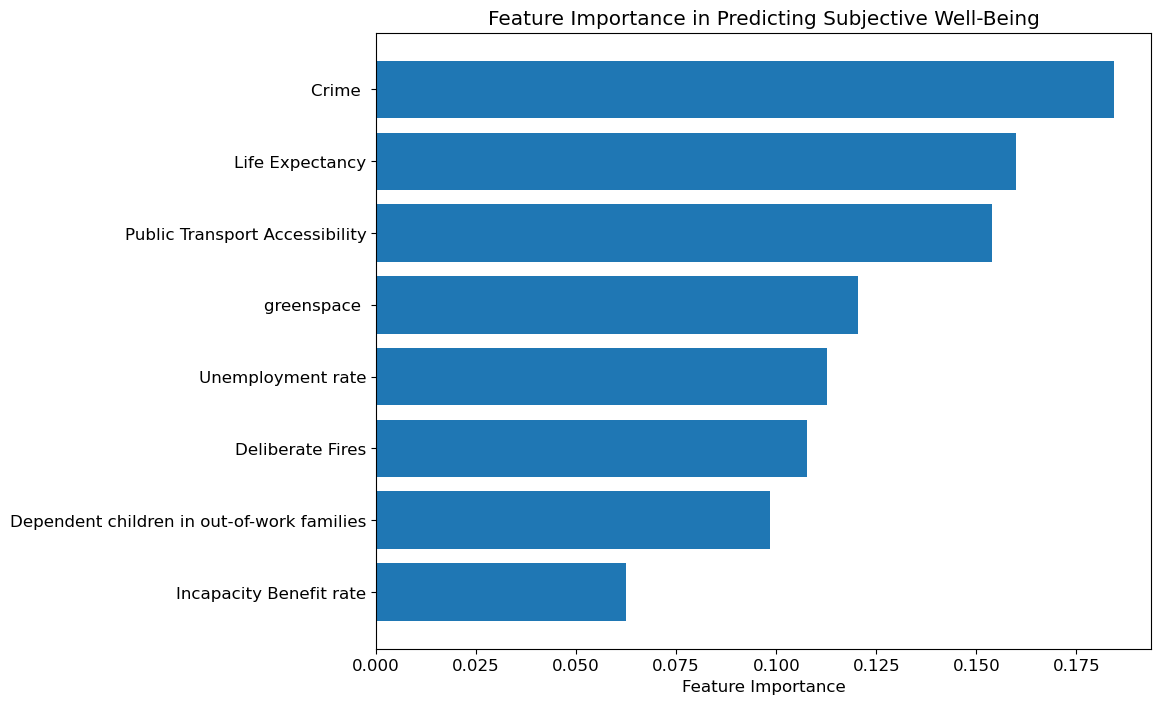

Mean Squared Error: 0.04334206429539458
R-squared: 0.05392848230738134
Life Expectancy: 0.1600
Incapacity Benefit rate: 0.0624
Unemployment rate: 0.1126
Crime : 0.1845
Deliberate Fires: 0.1077
Dependent children in out-of-work families: 0.0985
Public Transport Accessibility: 0.1539
greenspace : 0.1205


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = 'london data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

# Correcting the column name and selecting the features
X = data[['Life Expectancy', 'Incapacity Benefit rate', 'Unemployment rate', 'Crime ',
          'Deliberate Fires', 'Dependent children in out-of-work families',
          'Public Transport Accessibility', 'greenspace ']]
y = data['subjective well-being']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Gradient Boosting Regressor
gbdt = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbdt.fit(X_train, y_train)

# Making predictions on the test set
y_pred = gbdt.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Feature importance
feature_importance = gbdt.feature_importances_
sorted_idx = np.argsort(feature_importance)

# Plotting feature importance
plt.figure(figsize=(10, 8))
plt.barh(range(X.shape[1]), feature_importance[sorted_idx], align='center')
plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Predicting Subjective Well-Being')
plt.show()

# Output the Mean Squared Error and R-squared value
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Output the feature importance
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance:.4f}")

/Users/taoyang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/Users/taoyang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/Users/taoyang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/Users/taoyang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/Users/taoyang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warni

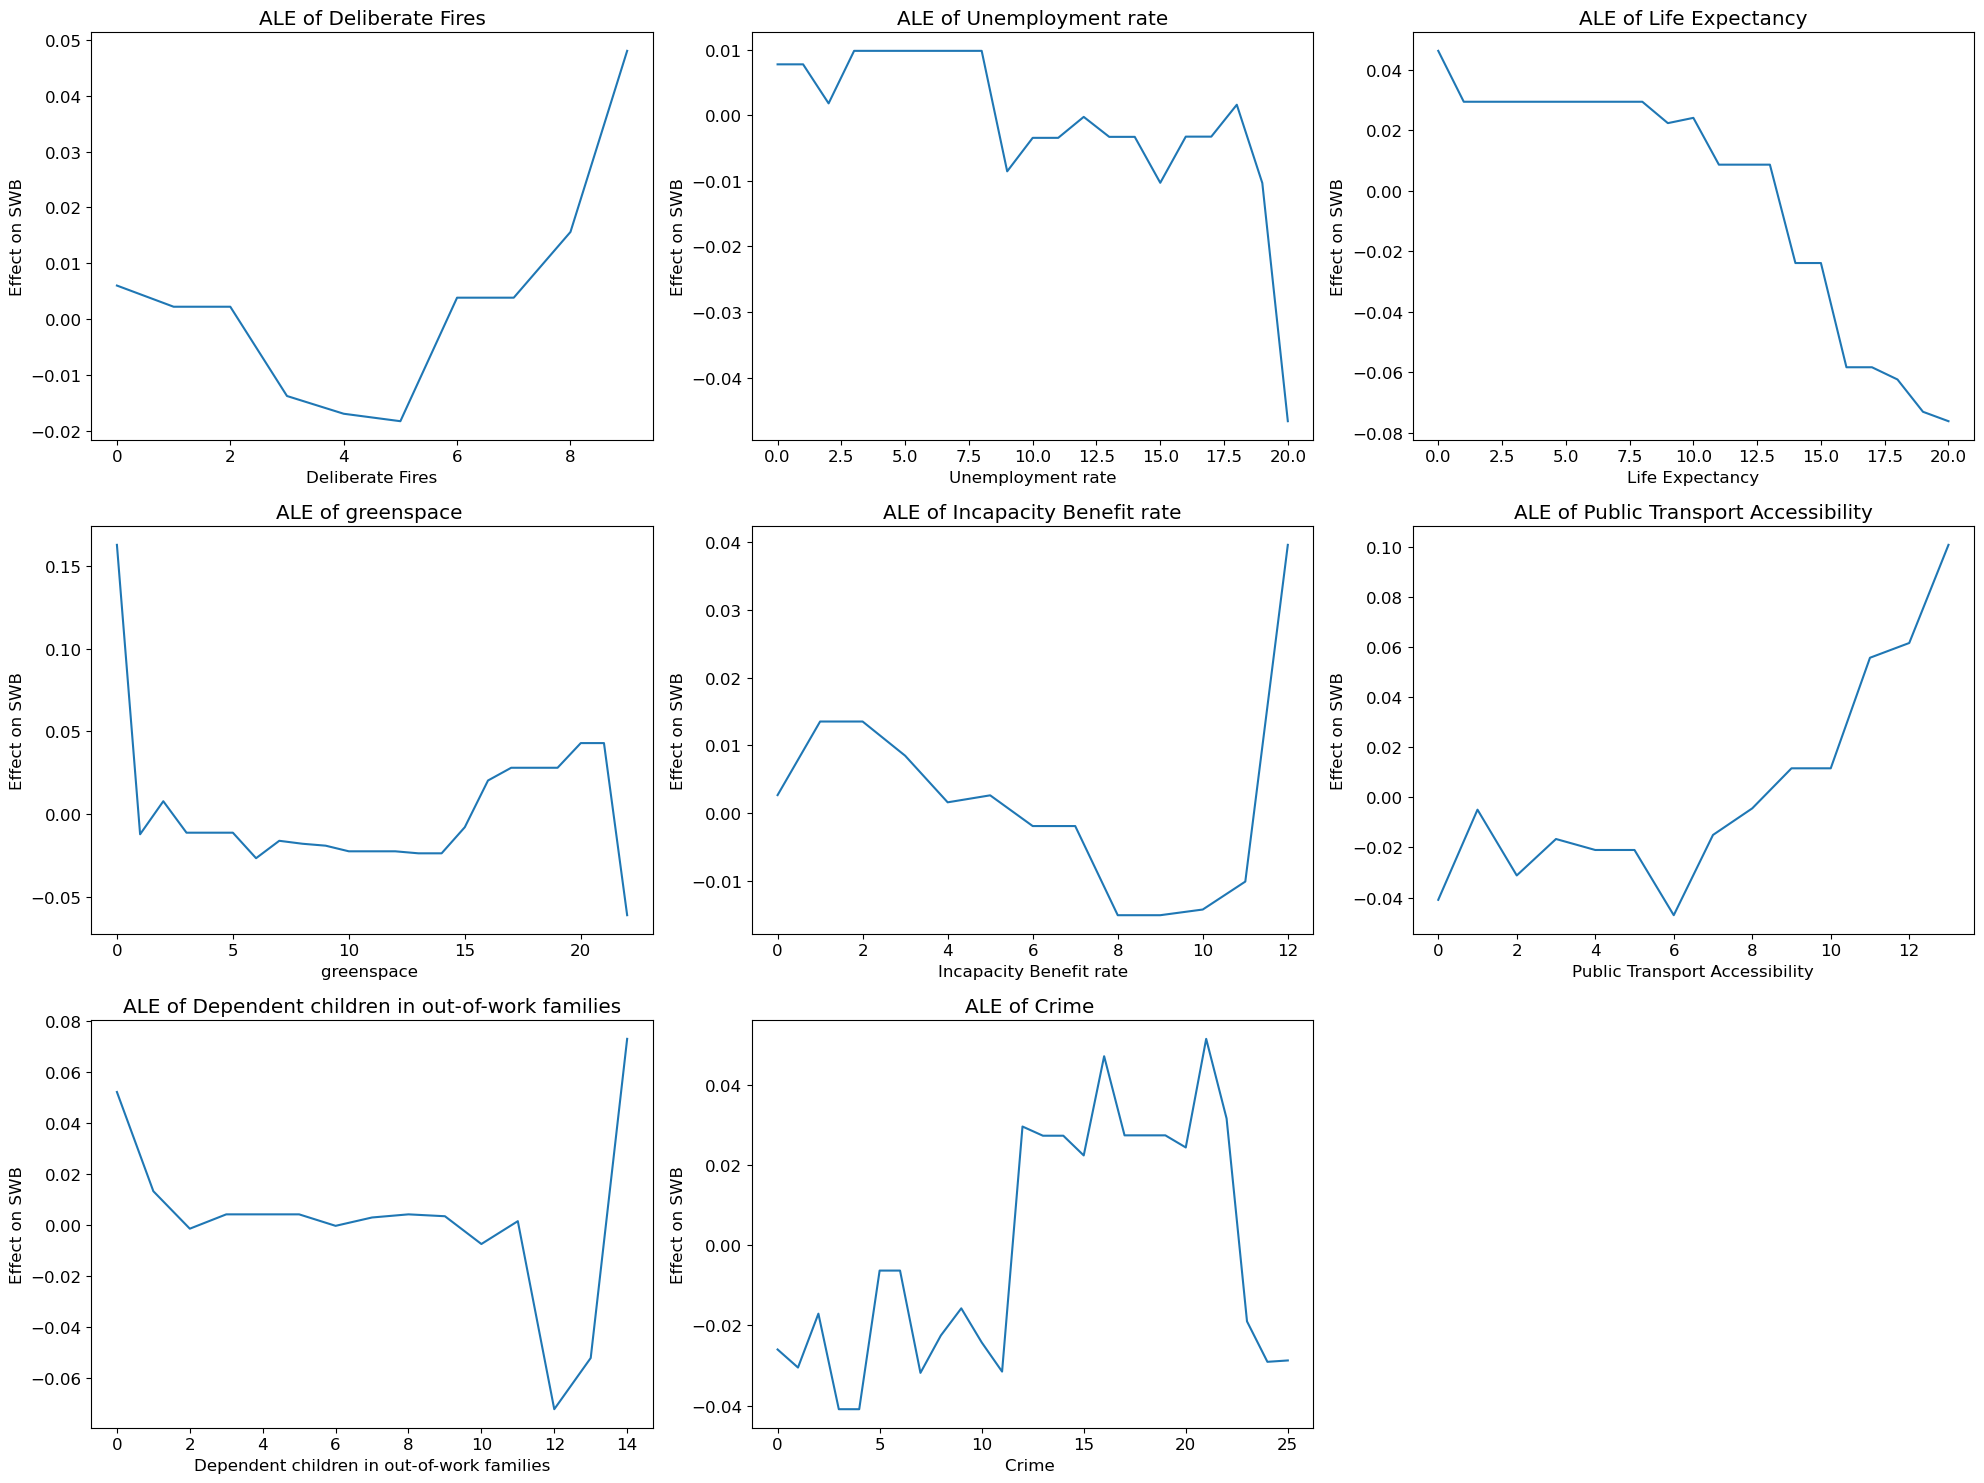

In [8]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from alibi.explainers import ALE
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv('london data.csv')

# 定义特征和目标变量
X = data[['Deliberate Fires', 'Unemployment rate', 'Life Expectancy', 'greenspace ', 
          'Incapacity Benefit rate', 'Public Transport Accessibility', 
          'Dependent children in out-of-work families', 'Crime ']]
y = data['subjective well-being']

# 切分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# 创建 ALE 解释器
ale = ALE(model.predict, feature_names=X.columns.tolist())

# 计算 ALE
ale_exp = ale.explain(X_test.values)

# 绘制 ALE 图
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

for i, ax in enumerate(ax.flatten()):
    if i < len(X.columns):
        ax.plot(ale_exp.ale_values[i])
        ax.set_title(f"ALE of {X.columns[i]}")
        ax.set_xlabel(X.columns[i])
        ax.set_ylabel("Effect on SWB")
    else:
        fig.delaxes(ax)  # 删除多余的子图框

plt.tight_layout()
plt.show()